In [ ]:
import matplotlib.pyplot
import numpy

In [ ]:
a = numpy.zeros( [3,2] )
print(a)

In [ ]:
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)

In [ ]:
print(a[0,1])
v = a[1,0]
print(v)

In [ ]:
matplotlib.pyplot.imshow(a, interpolation="nearest")

In [ ]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [ ]:
len(data_list)

In [ ]:
import numpy
import matplotlib.pyplot
%matplotlib inline  

# split each character by each comma, and make own string
all_values = data_list[0].split(',')


# converts pixel values into from strings to float since needed in numeric format to do computation

# reshape transforms original 28x28 pixels into 28x28 2D array
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))


# plots image_array using imshow() function with greyscale colour palatte cmap = 'Greys'
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None') #

print(all_values)

In [ ]:
data_list[0]
# Fist # is 5, rest of numbers are colour values for the pixels that make up the image.

In [ ]:
# asfarray converts strings in all_values into float to process in 2D array,
# excluding label and including pixel values

# divides each pixel value by 255. 
# Since the original values are in the range of 0 to 255, this
# scales them to the range of 0 to 1
# then multiplies each of the now normalized pixel values by 0.99. 
# this further scales the values to the range of 0 to 0.99.
# adds 0.01 to each scaled value. This final adjustment shifts the range from 0-0.99 to 0.01-1.00. 

scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

print(scaled_input)

In [ ]:
import numpy
import scipy.special
class neuralNetwork:

    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        # link weight matricies, wih and who
        # weights inside arrrays are w_i_j, where link is 
        # from node i to node j in the next layer
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate

        # activation function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    # train neural network
    def train(self, input_list, target_list):
        
        # convert inputs list to 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)

        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # output layer error is the (target - actual)
        output_errors = targets - final_outputs

        # hidden layer error is the output_errors, split by weights,
        # recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot(
            (output_errors * final_outputs * (1.0 - final_outputs)), 
            numpy.transpose((hidden_outputs))
        )
            

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot(
            (hidden_errors * hidden_outputs *(1.0 - hidden_outputs)), 
            numpy.transpose((inputs))
        )     
        
        pass

    # query neural network
    def query(self, input_list):

        # convert inputs list to 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        # calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [52]:

test_data_file = open('mnist_dataset/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [53]:
# calculate performance score, fraction of correct answers
scorecard_array = numpy.asarray(scorecard)

print("Performance = ", scorecard_array.sum() / scorecard_array.size)

# Performance changes from 50% to 94% when training neural network from 100 row dataset to 10,000 record dataset

Performance =  0.9516


In [ ]:
# Number of input hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.2

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train neural network
epochs = 1
# go through all records in the training data set
for e in range(epochs):
    for record in training_data_list:
        # split record by commas
        all_values = record.split(',')
        # scale and shift inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # create target output values (all 0.01 expect label 0.99)
        targets = numpy.zeros(output_nodes) + 0.01

        # all_values[0] is target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass

In [ ]:
# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set

for record in test_data_list:
    # split the record by the ',' commas 
    all_values = record.split(',')
    
    correct_label = int(all_values[0])
    print(correct_label, "Correct Label")

    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # query network
    outputs = n.query(inputs)

    # index of highest value corresponds to label
    label = numpy.argmax(outputs)
    print(label, 'Networks Predicted Answer')

    # append correct or incorrect to list
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

In [ ]:
print(scorecard)

In [54]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


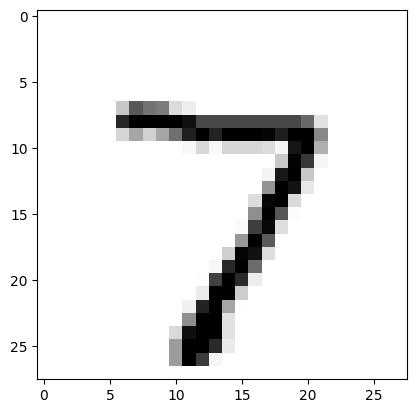

In [55]:
import matplotlib.pyplot
%matplotlib inline

image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))

matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation='None')


In [56]:
output = n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
prediction = numpy.argmax(output)
print("Predicted digit:", prediction)


n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

# Highest confidence is largets number at index 7!


Predicted digit: 7


array([[0.00795231],
       [0.00883851],
       [0.00666853],
       [0.0028966 ],
       [0.0042772 ],
       [0.00380474],
       [0.00792377],
       [0.99689405],
       [0.0018761 ],
       [0.00374523]])

In [57]:
print(len(test_data_list))

10000
